# Import modules

In [1]:
from lacbox.io import load_pwr, load_ind, load_inds
from lacbox.test import test_data_path
import matplotlib.pyplot as plt
from pathlib import Path
from lacbox.io import load_ae
import numpy as np
from Assignment_1.Assignment_1.Part_2_aero_design_functions import single_point_design, get_design_functions





In [2]:
# Plotting power for multiple tsr

# Path for the file
pwr_path = Path.cwd().parent / 'res_hawc2s' / 'Jim_Design_hawc2s_multitsr.pwr' 
# Load the data
pwr_data = load_pwr(pwr_path)
# Print the names in the dict
pwr_data.keys()


dict_keys(['V_ms', 'P_kW', 'T_kN', 'Cp', 'Ct', 'Pitch_Q_Nm', 'Flap_M_kNm', 'Edge_M_kNm', 'Pitch_deg', 'Speed_rpm', 'Tip_x_m', 'Tip_y_m', 'Tip_z_m', 'J_rot_kgm2', 'J_DT_kgm2', 'Torsion_rad', 'Torque_kNm'])

<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
C:\Users\jimwi\AppData\Local\Temp\ipykernel_17964\1915625111.py:11: SyntaxWarning: invalid escape sequence '\o'
  axs[1, 0].set_xlabel("Rotor-speed $\omega$ [m/s]")
C:\Users\jimwi\AppData\Local\Temp\ipykernel_17964\1915625111.py:15: SyntaxWarning: invalid escape sequence '\o'
  axs[1, 1].set_xlabel("Rotor-speed $\omega$ [m/s]")


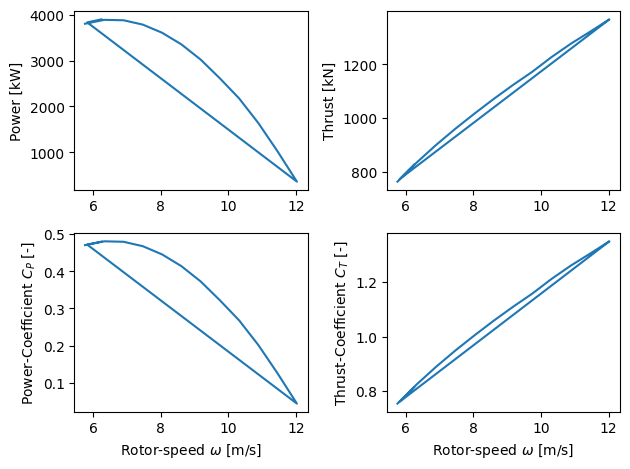

In [3]:
 #        V [m/s]  1           P [kW]  2           T [kN]  3           Cp [-]  4           Ct [-]  5     Pitch Q [Nm]  6     Flap M [kNm]  7     Edge M [kNm]  8      Pitch [deg]  9      Speed [rpm] 10        Tip x [m] 11        Tip y [m] 12        Tip z [m] 13   J_rot [kg*m^2] 14    J_DT [kg*m^2] 15      Tors. [rad] 28    Torque [kNm]  29
# Given rotor radius R (provide the value in meters)
R = 92.5  # [m]

# Load the data using np.loadtxt
# Adjust the delimiter and number of columns if needed
data = np.loadtxt('BB_redesign_hawc2s_multitsr.pwr', skiprows=1)

# Extract relevant columns
wind_speed = data[:, 0]  # V [m/s]
rpm = data[:, 9]         # Speed [rpm]
Cp = data[:, 3]          # Cp [-]
Ct = data[:, 4]          # Ct [-]
pitch = data[:,8]        # pitch [deg]

# Calculate omega (rad/s) and TSR
omega = np.pi * rpm / 30
TSR = (omega * R) / wind_speed

# Find the max Cp and its corresponding TSR
max_cp_index = np.argmax(Cp)
max_cp = Cp[max_cp_index]
max_tsr = TSR[max_cp_index]

print(max_tsr)


# Plot Cp vs TSR
plt.figure(figsize=(5, 3))
plt.plot(TSR, Cp)
# Plot the max point with an 'x'
plt.scatter(max_tsr, max_cp, color='red', marker='x', s=100, label=r'Max $C_P$')
plt.xlabel(r'$\lambda$ [-]')
plt.ylabel(r'$C_P$ [-]')
plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Part_3_Plots/CP_TSR_BB' + '.pdf', dpi=300, bbox_inches='tight')



# Plot Ct vs TSR
plt.figure(figsize=(5,3))
plt.plot(TSR, Ct)
plt.xlabel(r'$\lambda$ [-]')
plt.ylabel(r'$C_T$ [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Part_3_Plots/Ct_TSR_BB' + '.pdf', dpi=300, bbox_inches='tight')

In [4]:
# # Side-by-side plots of the HAWC2S lift coefficient and the design lift coefficient versus relative thickness (left plot) and versus radius (right plot) for design pitch and design TSR
# 
# BB_ind_file_path = Path.cwd().parent.parent / 'res_hawc2s' / 'BB_redesign_hawc2s_multitsr_u8013.ind'
# 
# # Load the data
# ind_data = load_ind(BB_ind_file_path)
# # Print the names in the dict
# print(ind_data.keys())
# 
# print(ind_data['s_m'])
# print(ind_data['Cl'])